In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

house_data = tf.keras.datasets.boston_housing
(train_data, train_targets), (test_data, test_targets) = house_data.load_data()

# train_data.shape(404,13) /// test_data.shape(102, 13)

# 데이터 정규화
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)
train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

# 모델 정의
def build_model():
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1)) # 하나의 유닛과 활성화 함수가 없으므로 선형 층(스칼라 회귀)
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = [tf.keras.metrics.MeanAbsoluteError()])
    # mse = Mean Squared Error, 
    return model



In [7]:
%%time
# K-겹 교차 검증(K-fold Cross-Validation) & 각 폴드에서 검증 점수 로그에 저장
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    # 훈련 데이터
    partial_train_data = np.concatenate([train_data[: i * num_val_samples],
                                        train_data[(i+1) * num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples],
                                           train_targets[(i+1) * num_val_samples:]], axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets), epochs = num_epochs, batch_size = 1, verbose =2) # 모델 훈련 과정 생략
                      
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    '''파이썬에서는 리스트 안에 for 문장을 놓는 리스트 내포(list comprehension)형식이 있다. 
    all_mae_histories는 4개의 폴드에 대한 검증 점수를 내포하고 있으므로 (4, 500) 크기이다.
    첫번째 리스트 내포에서 폴드별로 i번째 에포크의 점수를 평균하고, 두 번째 리스트 내포에서 전체 에포크를 순회시킨다.
    average_mae_history의 크기는 (500,)가 된다
    cf)넘파이를 사용하면 np.(all_mae_histories, axis = 0)으로 첫 번째 축을 따라 간단히 평균을 구할 수 있다.'''



처리중인 폴드 # 0
Epoch 1/100
303/303 - 1s - loss: 214.5418 - mean_absolute_error: 11.0773 - val_loss: 36.1893 - val_mean_absolute_error: 3.8134
Epoch 2/100
303/303 - 1s - loss: 31.2011 - mean_absolute_error: 3.8749 - val_loss: 24.4649 - val_mean_absolute_error: 3.0183
Epoch 3/100
303/303 - 1s - loss: 22.2103 - mean_absolute_error: 3.1301 - val_loss: 20.1343 - val_mean_absolute_error: 2.9801
Epoch 4/100
303/303 - 1s - loss: 19.0195 - mean_absolute_error: 2.7868 - val_loss: 15.7570 - val_mean_absolute_error: 2.5594
Epoch 5/100
303/303 - 1s - loss: 16.3020 - mean_absolute_error: 2.7354 - val_loss: 14.7285 - val_mean_absolute_error: 2.5358
Epoch 6/100
303/303 - 1s - loss: 15.5304 - mean_absolute_error: 2.5657 - val_loss: 14.1788 - val_mean_absolute_error: 2.3265
Epoch 7/100
303/303 - 1s - loss: 14.4165 - mean_absolute_error: 2.5149 - val_loss: 13.5279 - val_mean_absolute_error: 2.2824
Epoch 8/100
303/303 - 1s - loss: 14.2190 - mean_absolute_error: 2.4883 - val_loss: 11.8235 - val_mean_absolute_

Epoch 67/100
303/303 - 1s - loss: 4.9527 - mean_absolute_error: 1.5599 - val_loss: 9.8471 - val_mean_absolute_error: 2.3718
Epoch 68/100
303/303 - 1s - loss: 5.2196 - mean_absolute_error: 1.5785 - val_loss: 9.9703 - val_mean_absolute_error: 2.2921
Epoch 69/100
303/303 - 1s - loss: 4.6447 - mean_absolute_error: 1.4860 - val_loss: 9.6480 - val_mean_absolute_error: 2.3019
Epoch 70/100
303/303 - 1s - loss: 4.8418 - mean_absolute_error: 1.5076 - val_loss: 8.9845 - val_mean_absolute_error: 2.2763
Epoch 71/100
303/303 - 1s - loss: 4.8142 - mean_absolute_error: 1.4828 - val_loss: 10.1102 - val_mean_absolute_error: 2.3603
Epoch 72/100
303/303 - 1s - loss: 4.9831 - mean_absolute_error: 1.5153 - val_loss: 9.0186 - val_mean_absolute_error: 2.0137
Epoch 73/100
303/303 - 1s - loss: 4.6584 - mean_absolute_error: 1.4535 - val_loss: 8.9720 - val_mean_absolute_error: 2.0841
Epoch 74/100
303/303 - 1s - loss: 4.7096 - mean_absolute_error: 1.4829 - val_loss: 8.9705 - val_mean_absolute_error: 2.0276
Epoch 7

Epoch 33/100
303/303 - 1s - loss: 7.1654 - mean_absolute_error: 1.7968 - val_loss: 12.1676 - val_mean_absolute_error: 2.6873
Epoch 34/100
303/303 - 1s - loss: 7.5914 - mean_absolute_error: 1.7961 - val_loss: 10.9918 - val_mean_absolute_error: 2.4975
Epoch 35/100
303/303 - 1s - loss: 7.5110 - mean_absolute_error: 1.7964 - val_loss: 11.2571 - val_mean_absolute_error: 2.6122
Epoch 36/100
303/303 - 1s - loss: 7.5310 - mean_absolute_error: 1.7904 - val_loss: 9.6955 - val_mean_absolute_error: 2.3352
Epoch 37/100
303/303 - 1s - loss: 7.2432 - mean_absolute_error: 1.7235 - val_loss: 11.5079 - val_mean_absolute_error: 2.6065
Epoch 38/100
303/303 - 1s - loss: 7.3823 - mean_absolute_error: 1.7849 - val_loss: 10.3443 - val_mean_absolute_error: 2.4246
Epoch 39/100
303/303 - 1s - loss: 7.3504 - mean_absolute_error: 1.7713 - val_loss: 9.7408 - val_mean_absolute_error: 2.3744
Epoch 40/100
303/303 - 1s - loss: 7.3489 - mean_absolute_error: 1.7195 - val_loss: 11.5969 - val_mean_absolute_error: 2.6406
Ep

Epoch 99/100
303/303 - 1s - loss: 3.9905 - mean_absolute_error: 1.3391 - val_loss: 14.6991 - val_mean_absolute_error: 2.7449
Epoch 100/100
303/303 - 1s - loss: 3.9915 - mean_absolute_error: 1.3642 - val_loss: 17.5415 - val_mean_absolute_error: 2.9039
처리중인 폴드 # 2
Epoch 1/100
303/303 - 1s - loss: 190.8337 - mean_absolute_error: 10.3872 - val_loss: 35.0047 - val_mean_absolute_error: 4.2082
Epoch 2/100
303/303 - 1s - loss: 28.3999 - mean_absolute_error: 3.6188 - val_loss: 24.8172 - val_mean_absolute_error: 3.4173
Epoch 3/100
303/303 - 1s - loss: 18.4691 - mean_absolute_error: 2.9370 - val_loss: 23.2609 - val_mean_absolute_error: 3.3800
Epoch 4/100
303/303 - 1s - loss: 15.8013 - mean_absolute_error: 2.7645 - val_loss: 18.8350 - val_mean_absolute_error: 2.6616
Epoch 5/100
303/303 - 1s - loss: 13.7811 - mean_absolute_error: 2.5888 - val_loss: 18.5323 - val_mean_absolute_error: 2.9078
Epoch 6/100
303/303 - 1s - loss: 12.3101 - mean_absolute_error: 2.4184 - val_loss: 17.6461 - val_mean_absolute

Epoch 65/100
303/303 - 1s - loss: 4.4195 - mean_absolute_error: 1.4730 - val_loss: 14.2807 - val_mean_absolute_error: 2.5411
Epoch 66/100
303/303 - 1s - loss: 4.0164 - mean_absolute_error: 1.3834 - val_loss: 14.8572 - val_mean_absolute_error: 2.6937
Epoch 67/100
303/303 - 1s - loss: 4.0698 - mean_absolute_error: 1.4047 - val_loss: 15.0515 - val_mean_absolute_error: 2.5418
Epoch 68/100
303/303 - 1s - loss: 4.0636 - mean_absolute_error: 1.4080 - val_loss: 15.0466 - val_mean_absolute_error: 2.6676
Epoch 69/100
303/303 - 1s - loss: 4.3501 - mean_absolute_error: 1.4721 - val_loss: 14.9443 - val_mean_absolute_error: 2.6828
Epoch 70/100
303/303 - 1s - loss: 3.9890 - mean_absolute_error: 1.4329 - val_loss: 15.0269 - val_mean_absolute_error: 2.6663
Epoch 71/100
303/303 - 1s - loss: 3.9940 - mean_absolute_error: 1.4294 - val_loss: 14.5784 - val_mean_absolute_error: 2.5643
Epoch 72/100
303/303 - 1s - loss: 4.1243 - mean_absolute_error: 1.4247 - val_loss: 15.4381 - val_mean_absolute_error: 2.7622


Epoch 31/100
303/303 - 1s - loss: 7.6110 - mean_absolute_error: 1.8104 - val_loss: 13.2309 - val_mean_absolute_error: 2.5945
Epoch 32/100
303/303 - 1s - loss: 7.1001 - mean_absolute_error: 1.8073 - val_loss: 14.3744 - val_mean_absolute_error: 2.5761
Epoch 33/100
303/303 - 1s - loss: 7.0176 - mean_absolute_error: 1.7356 - val_loss: 13.8172 - val_mean_absolute_error: 2.6973
Epoch 34/100
303/303 - 1s - loss: 7.2450 - mean_absolute_error: 1.7123 - val_loss: 13.0672 - val_mean_absolute_error: 2.5382
Epoch 35/100
303/303 - 1s - loss: 7.0068 - mean_absolute_error: 1.7391 - val_loss: 12.9393 - val_mean_absolute_error: 2.5312
Epoch 36/100
303/303 - 1s - loss: 7.4803 - mean_absolute_error: 1.7629 - val_loss: 12.4181 - val_mean_absolute_error: 2.4366
Epoch 37/100
303/303 - 1s - loss: 6.8490 - mean_absolute_error: 1.7302 - val_loss: 13.4514 - val_mean_absolute_error: 2.6004
Epoch 38/100
303/303 - 1s - loss: 7.4187 - mean_absolute_error: 1.7263 - val_loss: 12.5539 - val_mean_absolute_error: 2.4265


Epoch 97/100
303/303 - 1s - loss: 4.2339 - mean_absolute_error: 1.3213 - val_loss: 12.1380 - val_mean_absolute_error: 2.4235
Epoch 98/100
303/303 - 1s - loss: 3.9031 - mean_absolute_error: 1.3243 - val_loss: 12.5335 - val_mean_absolute_error: 2.5916
Epoch 99/100
303/303 - 1s - loss: 4.1159 - mean_absolute_error: 1.3003 - val_loss: 12.1148 - val_mean_absolute_error: 2.4746
Epoch 100/100
303/303 - 1s - loss: 4.1052 - mean_absolute_error: 1.3283 - val_loss: 13.4731 - val_mean_absolute_error: 2.5998
CPU times: user 9min 46s, sys: 1min 1s, total: 10min 47s
Wall time: 6min 57s


In [8]:
# 지수 이동 평균(Exponential Moving Average)적용과 스케일이 많이 다른 첫 10개 데이터 포인트 제외

def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
            
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

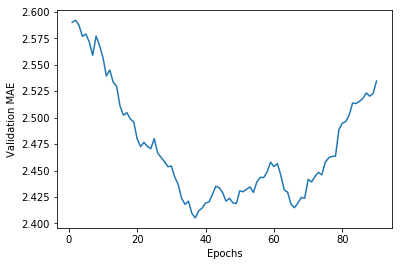

4/4 [==============================] - 0s 1ms/step - loss: 16.7573 - mean_absolute_error: 2.4423
2.442251205444336


In [11]:
# 검증 점수 그래프
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)  
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# 최종 모델 훈련하기
model = build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)